# Toy Model of the Fermion Sign Problem

Following [this](https://arxiv.org/abs/1601.01558) article on the fermion sign problem, we are interested in the **Decisional Fermion Sign Problem** (Eq. 50).

In this notebook we want to demonstrate that it is possible to find a one dimensional integral that shows the same difficulty as the multi-dimensional one, for $\tau \rightarrow \infty$, or $C \rightarrow 0$.
We will try to answer this question by computing the integral with Markov Chain Monte Carlo (MCMC), and we will show that the scaling is exponential.

With this goal in mind we replace $R \mapsto x$, $S \mapsto s$,
$$
\det(\phi_{\alpha}(\mathbf{s}_{\beta})) \mapsto \sin(k \, s) \; ,
$$
and
$$
J_S(S) \mapsto e^{- \frac{1}{2} \omega^2 s^2} \; ,
$$
where $k$ and $\omega$ are two model parameters that affect the gravity of the sign problem.

#### One-Dimensional Decisional Fermion Sign Problem

Is the value of the integral
$$
\Psi(x) = \int ds \, e^{-\frac{(x-s)^2}{\tau^2}} \, \sin(k \, s) \, e^{- \frac{1}{2} \omega^2 s^2}  \label{eq:decisional_problem} \tag{Decisional Fermion Sign Problem}
$$
strictly greater than zero?

In [1]:
from typing import List

## Wave Function components

We first define the basic components of the integral we are interested in.

In [2]:
var('s,x,k,w,tau')

(s, x, k, w, tau)

In [3]:
K = e^(-(x-s)^2/(tau^2))
print('K =', K)

S = sin(k*s)
print('S =', S)

J = e^(-w*w*s*s/2)
print('J =', J)

K = e^(-(s - x)^2/tau^2)
S = sin(k*s)
J = e^(-1/2*s^2*w^2)


To compute the integral in ([Decisional Fermion Sign Problem](#mjx-eqn-eq:decisional_problem)) in a MCMC fashion, we further define

In [4]:
rho = K * J
print('rho =', rho)

g = S
print('g =', g)

rho = e^(-1/2*s^2*w^2 - (s - x)^2/tau^2)
g = sin(k*s)


Finally, we set some assumptions that will be useful to sage for computing the integrals.

In [5]:
assume(tau>0)
assume(w>0)
assume(k>0)
assume(tau, 'noninteger')
assume(w, 'noninteger')
assume(k, 'noninteger')

## Shadow Wave Function integrand

For convenience we introduce
\begin{eqnarray}
  \Psi(x) &=& \int ds \, e^{-\frac{(x-s)^2}{\tau^2}} \, \sin(k \, s) \, e^{- \frac{1}{2} \omega^2 s^2} \\
          &=& \int ds \, \psi(x, s)
\end{eqnarray}

In [6]:
psi = rho * g

In [7]:
def latex_parameter(p: str) -> str:
    if p == 'w':
        return r'\omega'
    elif p == 'tau':
        return r'\tau'
    else:
        return p

In [37]:
def plot_psi_with_variations(parameter: str, values: List[float]) -> sage.plot.graphics.Graphics:
    psi_parameters = {'x': x0, 'k': k0, 'w': w0, 'tau': tau0}
    psi_parameters.pop(parameter)
    psi_arguments_string = ', '.join([f'{latex_parameter(l)}={float(v):.1f}' for l, v in psi_parameters.items()])
    p = plot([psi(**{parameter: v}, **psi_parameters) for v in values],
            (s, smin, smax),
            legend_label=[f'${latex_parameter(parameter)}$ = {float(v):.2f}' for v in values],
            axes_labels=[r'$s$', r'$\psi({})$'.format(psi_arguments_string)])
    return p

We now show in some plots how the parameters $x$, $k$, $\omega$, and $\tau$ affect $\psi(x, s)$.

We will do so by setting some default values as follows:

In [38]:
smin, smax = -5., 5.
x0 = 1.
k0 = 5.
w0 = 0.5
tau0 = 1.

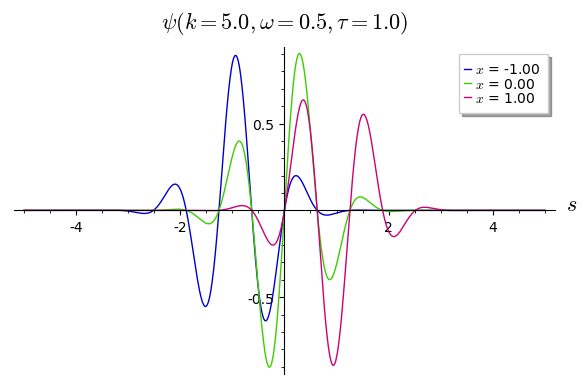

In [39]:
plot_psi_with_variations(parameter='x', values=[-x0, 0., x0]).show()

$x$ shifts the **center of $\psi$**. We will use this naming in the following.

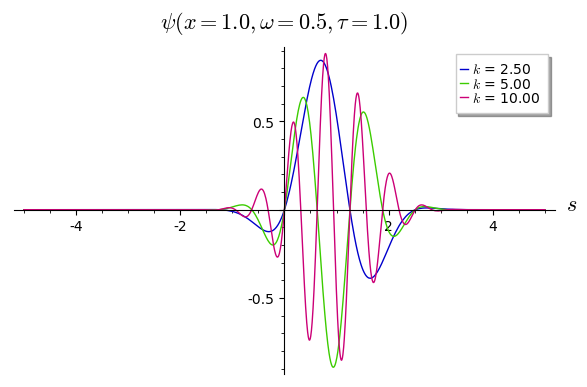

In [42]:
plot_psi_with_variations(parameter='k', values=[0.5*k0, k0, 2*k0]).show()

Increasing $k$ makes $\psi$ oscillates with a higher frequency.

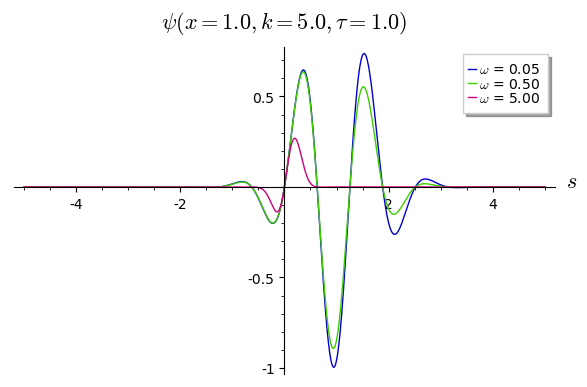

In [43]:
plot_psi_with_variations(parameter='w', values=[0.1*w0, w0, 10.*w0]).show()

$\omega$ controls how quickly $\psi$ decays with the distance from the origin.

In [44]:
plot_psi_with_variations(parameter='tau', values=[0.5*tau0, tau0, 2.*tau0]).show()

$\tau$ controls how quickly $\psi$ decays with the distance from the "center" of $\psi$. The larget the value, the fastest the decay.

## Wave Function

Let us now look at $\Psi(x)$. In this section we define it (it is possible to compute the integral analytically) and we plot it with different choices of parameters, to observe their effects.

In [45]:
Psi = psi.integral(s, -infinity, infinity)
Psi

sqrt(pi)*tau*e^(-1/2*k^2*tau^2/(tau^2*w^2 + 2) + 2*x^2/(tau^4*w^2 + 2*tau^2) - x^2/tau^2)*sin(2*k*x/(tau^2*w^2 + 2))/sqrt(1/2*tau^2*w^2 + 1)

In [46]:
xmin, xmax = -5., 5.

In [49]:
def plot_Psi_with_variations(parameter: str, values: List[float]):
    psi_parameters = {'k': k0, 'w': w0, 'tau': tau0}
    psi_parameters.pop(parameter)
    psi_arguments_string = ', '.join([f'{latex_parameter(l)}={float(v):.1f}' for l, v in psi_parameters.items()])
    p = plot([Psi(**{parameter: v}, **psi_parameters) for v in values],
            (x, xmin, xmax),
            legend_label=[f'${latex_parameter(parameter)}$ = {float(v):.2f}' for v in values],
            axes_labels=[r'$x$', r'$\Psi({})$'.format(psi_arguments_string)])
    return p

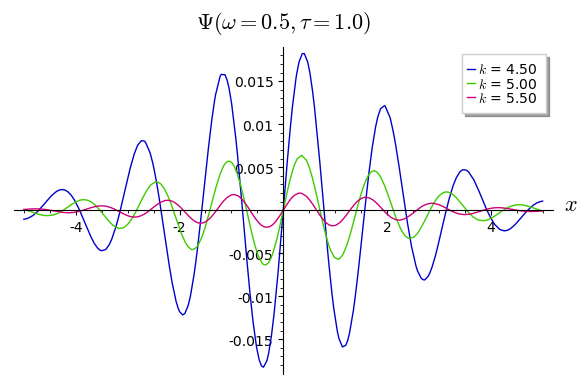

In [50]:
plot_Psi_with_variations(parameter='k', values=[0.9*k0, k0, 1.1*k0]).show()

As expected, $k$ controls the frequency of oscillations in $\Psi$ and its amplitude. The higher the frequency, the lower the amplitude.

In [51]:
plot_Psi_with_variations(parameter='w', values=[0.5*w0, w0, 2.*w0]).show()

Also $\omega$ controls the amplitude of $\Psi$ and how fast id decays with the distance from the origin. The effect on the amplitude does not seem to be as strong as obtained with $k$. In fact here we changed the parameter value by a factor of $1/2$, whereas for $k$ we had to limit the change to a factor $1/10$ to have something observable on the plot chart.

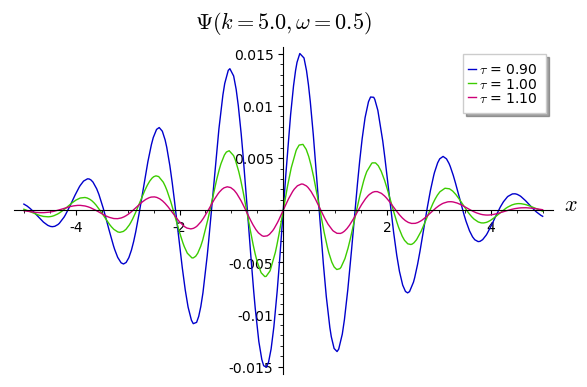

In [52]:
plot_Psi_with_variations(parameter='tau', values=[0.9*tau0, tau0, 1.1*tau0]).show()

Finally, $\tau$ seems also to play a similar role as $k$.

#### Conclusion

It seems that $\tau$ and $k$ can make the signal decrease exponentially. They are good candidates for playing the roles of the imaginary time propagation (as expected) and the number of particles for the multi-dimensional case.

## Decisional Fermion Sign Problem with MCMCM

In order to asses the sign of $\Psi$ with MCMC, we need to compute the integral up to a minimum precision in which the estimated error is smaller than the signal, i.e.
$$
\sigma_{\text{MCMC}}(\Psi)(x) < \left| E_{\text{MCMC}}(\Psi) \right|(x)
$$
where
\begin{eqnarray}
\sigma_{\text{MCMC}}(\Psi)(x) &=& \sqrt{\frac{\int ds \, \rho(s, x) \, g^2(s) - \Psi^2(x)}{N_{\text{MCMC}} - 1}} \\
\left| E_{\text{MCMC}}(\Psi) \right|(x) &=& \left| \Psi(x) \right|
\end{eqnarray}

This is equivalent to ask
$$
\frac{\left| E_{\text{MCMC}}(\Psi) \right|(x)}{\sigma_{\text{MCMC}}(\Psi)(x)} > 1
$$
For a large enough $N_{\text{MCMC}}$ such condition can be always satisfied. Of course, the problem is that the required $N_{\text{MCMC}}$ may be so large that it could be computationally unfeasible.

As a matter of fact we can even derive a formula for it:
$$
\sqrt{N - 1} > \frac{\sqrt{\int ds \, \rho(s, x) \, g^2(s) - \Psi^2(x)}}{\left| \Psi(x) \right|}
$$

$$
N > \frac{\int ds \, \rho(s, x) \, g^2(s) - \Psi^2(x)}{\Psi^2(x)} + 1
$$

$$
N > \frac{\int ds \, \rho(s, x) \, g^2(s)}{\Psi^2(x)} \label{eq:min_N_MCMC} \tag{Min. number of MCMC samplings}
$$

We can have a look at the numerator in Eq. ([Min. number of MCMC samplings](#mjx-eqn-eq:min_N_MCMC))

In [21]:
mcmc_g_squared_estimator = rho * (g^2)
mcmc_g_squared = mcmc_g_squared_estimator.integrate(s, -infinity, +infinity)
mcmc_g_squared

-1/2*sqrt(pi)*tau*cos(4*k*x/(tau^2*w^2 + 2))*e^(-2*k^2*tau^2/(tau^2*w^2 + 2) + 2*x^2/(tau^4*w^2 + 2*tau^2) - x^2/tau^2)/sqrt(1/2*tau^2*w^2 + 1) + 1/2*sqrt(pi)*tau*e^(2*x^2/(tau^4*w^2 + 2*tau^2) - x^2/tau^2)/sqrt(1/2*tau^2*w^2 + 1)

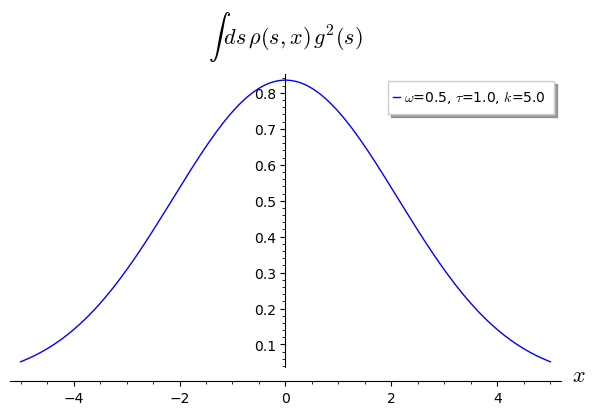

In [22]:
plot(mcmc_g_squared(x=x, w=w0, tau=tau0, k=k0), (x, -5., 5.),
     legend_label=r'$\omega$={:.1f}, $\tau$={:.1f}, $k$={:.1f}'.format(w0, tau0, k0),
     axes_labels=[r'$x$', r'$\int \, ds \, \rho(s, x) \, g^2(s)$'])

and at its denominator

In [23]:
Psi2 = Psi * Psi

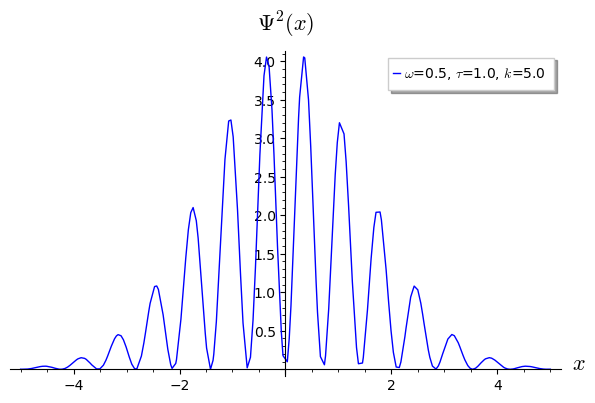

In [24]:
plot(Psi2(x=x, w=w0, tau=tau0, k=k0), (x, -5., 5.),
     legend_label=r'$\omega$={:.1f}, $\tau$={:.1f}, $k$={:.1f}'.format(w0, tau0, k0),
     axes_labels=[r'$x$', r'$\Psi^2(x)$'])

Now let us plot the value of the minimum number of MCMCM samplings required to asnwer the Decisional Fermion Sign Problem for some different values of $\omega$, $\tau$, and $k$, i.e.
$$
n \equiv \frac{\int ds \, \rho(s, x) \, g^2(s)}{\Psi^2(x)}
$$

In [25]:
min_N_MCMC = mcmc_g_squared / Psi2

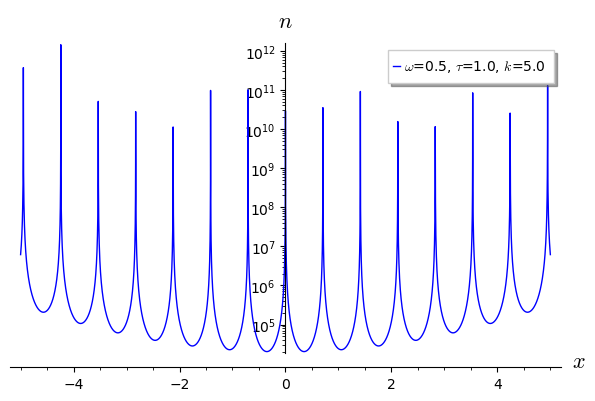

In [26]:
plot(min_N_MCMC(x=x, w=w0, tau=tau0, k=k0), (x, -5., 5.), scale='semilogy',
     legend_label=r'$\omega$={:.1f}, $\tau$={:.1f}, $k$={:.1f}'.format(w0, tau0, k0),
     axes_labels=[r'$x$', r'$n$'])

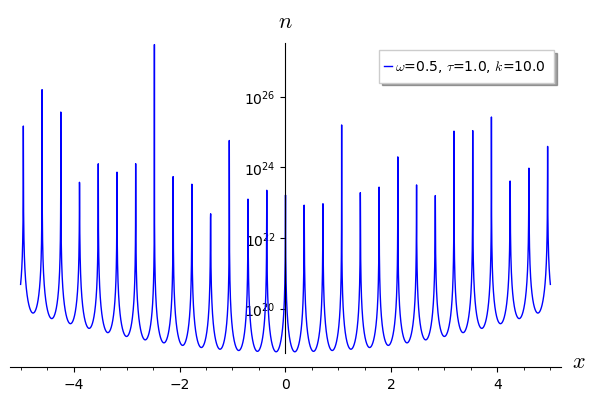

In [27]:
plot(min_N_MCMC(x=x, w=w0, tau=tau0, k=2.*k0), (x, -5., 5.), scale='semilogy',
     legend_label=r'$\omega$={:.1f}, $\tau$={:.1f}, $k$={:.1f}'.format(w0, tau0, 2.*k0),
     axes_labels=[r'$x$', r'$n$'])

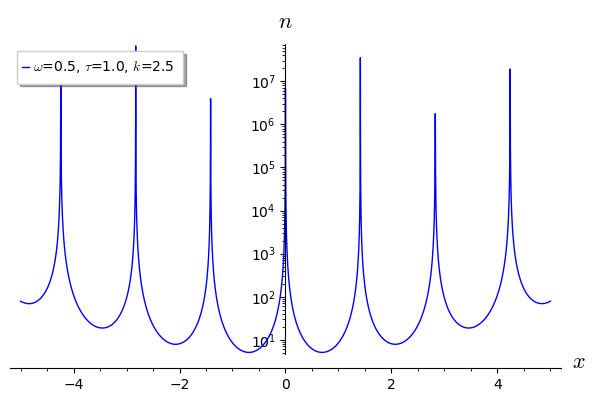

In [28]:
plot(min_N_MCMC(x=x, w=w0, tau=tau0, k=0.5*k0), (x, -5., 5.), scale='semilogy',
     legend_label=r'$\omega$={:.1f}, $\tau$={:.1f}, $k$={:.1f}'.format(w0, tau0, 0.5*k0),
     axes_labels=[r'$x$', r'$n$'])

From such plots we can understand that the Decisional Fermion Sign Problem was ill-posed: when the wave function is equal to zero, MCMC will never be able to determine its sign. However, it is clear that this should not stop us: if the wave function is zero, or numerically equivalent to zero, then the contribution of this case to the computation of quantities such as energy is also zero, and therefore irrelevant.
It becomes then clear that it is necessary to introduce a threshold for the value of the wave function, under which the sign of the wave function is not important. This poses quite some problems in practice.

Let us leave this matter on the side for now, and focus on the best case, i.e. the minimum of the plots above, and see its behavior with different values of $\omega$, $\tau$, and $k$. 
For brevity, we will refer to this best case value as BCMN (Best-Case Minimum Number of samplings) and we will denote it as $\tilde{n}$. In formula:
$$
\tilde{n} = \min_x(n)
$$

For what we are concerned, $\tilde{n}$ represents the scaling of the sign problem with a MCMC approach.

In [29]:
best_case_N_MCMC = min_N_MCMC(x=pi/(k*2))
best_case_N_MCMC

-1/4*(tau^2*w^2 + 2)*(sqrt(pi)*tau*cos(2*pi/(tau^2*w^2 + 2))*e^(-2*k^2*tau^2/(tau^2*w^2 + 2) + 1/2*pi^2/((tau^4*w^2 + 2*tau^2)*k^2) - 1/4*pi^2/(k^2*tau^2))/sqrt(1/2*tau^2*w^2 + 1) - sqrt(pi)*tau*e^(1/2*pi^2/((tau^4*w^2 + 2*tau^2)*k^2) - 1/4*pi^2/(k^2*tau^2))/sqrt(1/2*tau^2*w^2 + 1))*e^(k^2*tau^2/(tau^2*w^2 + 2) - pi^2/((tau^4*w^2 + 2*tau^2)*k^2) + 1/2*pi^2/(k^2*tau^2))/(pi*tau^2*sin(pi/(tau^2*w^2 + 2))^2)

### Scaling with $\omega$

In [30]:
plot(best_case_N_MCMC(tau=tau0, k=k0), (w, 0.1*w0, 25.*w0), scale='semilogy',
     legend_label=r'$\tau$={:.1f}, $k$={:.1f}'.format(tau0, k0),
     axes_labels=[r'$\omega$', r'$\tilde{n}$'])

The behaviour with $\omega$ is rather strange: it first decreases but then increases. The decreasing is somewhat expected, as the domain to integrate is reduced, and therefore the sign flactuactions play a smaller role.

In [45]:
limit(best_case_N_MCMC/exp(w), w=infinity)

0

The above cell shows that
$$
\lim_{\omega \rightarrow \infty} \frac{\tilde{n}}{e^{\omega}} = 0
$$
In other words, $\tilde{n}$ does not grow exponentially with $\omega$.

In [48]:
limit(best_case_N_MCMC/w^3, w=infinity)

1/2*sqrt(2)*k^2*tau^4*e^(1/4*pi^2/(k^2*tau^2))/pi^(5/2)

The above cell shows that for the limit of $\omega \rightarrow \infty$, $\tilde{n}$ grows with the power of $3$.

### Scaling with $\tau$

In [31]:
plot(best_case_N_MCMC(w=w0, k=k0), (tau, 0.1*tau0, 10.*tau0), scale='semilogy',
     legend_label=r'$\omega$={:.1f}, $k$={:.1f}'.format(w0, k0),
     axes_labels=[r'$\tau$', r'$\tilde{n}$'])

The behaviour of $\tau$ is also partially unexpected: we would have expected a rather constant exponential increase, but instead it seems that there is an upper limit. This could be explained by the fact that once $\tau$ becomes very large and make the shadow wave function be integrated over all the regions "permitted" by $\omega$, then further increase will become irrelevant. If our explanation is true, then we should see a shift in the plateau if we decrease $\omega$:

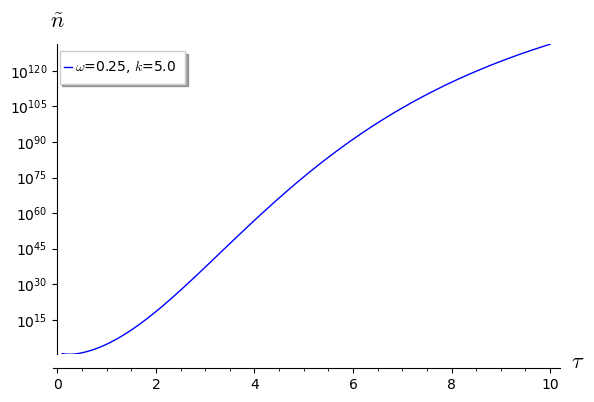

In [32]:
plot(best_case_N_MCMC(w=0.5*w0, k=k0), (tau, 0.1*tau0, 10.*tau0), scale='semilogy',
     legend_label=r'$\omega$={:.2f}, $k$={:.1f}'.format(0.5*w0, k0),
     axes_labels=[r'$\tau$', r'$\tilde{n}$'])

This is indeed the case.

In [43]:
limit(best_case_N_MCMC/exp(tau), tau=infinity)

0

The above cell demonstrate that $\tilde{n}$ does not grow exponentially with $\tau$ as in the limit of $\tau \rightarrow \infty$. This is unexpected, as this is what it known regarding the fermion sign problem. 

However, the exponential growth has been known from empirical simulations, and has never been explored the limit for $\tau \rightarrow \infty$. As a matter of fact, the MCMC efficiency becomes tremendously low way before this limit can be reached, and it remained therefore unaccessible.

Theoretically speaking, this finding may be an interesting point: the sign problem may grow exponentially for a certain range of $\tau$, but then converge to a polynomial scaling. This means that one need to beat the exponential scaling only in a limited region of the imaginary time propagation.

In [50]:
limit(best_case_N_MCMC/tau^4, tau=infinity)

1/4*(sqrt(2)*e^(2*k^2/w^2) - sqrt(2))*w^5*e^(-k^2/w^2)/pi^(5/2)

The cell above shows that, for the limit of $\tau \rightarrow \infty$, the scaling is a polynomial of order $4$.

### Scaling with $k$

In [33]:
plot(best_case_N_MCMC(w=w0, tau=tau0), (k, 0.1*k0, 3.*k0), scale='semilogy',
     legend_label=r'$\tau$={:.1f}, $\omega$={:.1f}'.format(tau0, w0),
     axes_labels=[r'$k$', r'$\tilde{n}$'])

Finally, we can see that $\tilde{n}$ grows more-than-exponentially with $\tau$

In [44]:
limit(best_case_N_MCMC/exp(k), k=infinity)

+Infinity

The cell above demonstrate that the scaling with $k$ is more-than-exponential.

## Conclusion

We have seen that the presented one-dimensional toy model for the Fermion Sign Problem fulfill the desired requirement of scaling exponentially with growing $\tau$ (imaginary time) and $k$ (plays the same role as the number of particles) at least in the region of practical interest.

We have also seen that the Decision Fermion Sign Problem (first introduced [here](https://arxiv.org/abs/1601.01558)) is ill-posed, as it neglected the problem of the case in which the wave function is zero, that is intrisically non-solvable, but at the same time irrelevant for the solution of the fermion sign problem.

Finally, we have seen that, at least in the limits of this model, it seems that the scaling with the imaginary time is not exponential in the limit of $\tau \rightarrow \infty$, but rather polynomial of order $4$. This collides with the common notion of the fefermion sign problem.